In [1]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from IPython.display import Image
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image, ImageEnhance, ImageFilter
from PIL import ImageOps
import pandas as pd
import os
import numpy as np
from PIL import Image
import cv2

In [117]:
# Create a list to store the image arrays
train_images_list = []

# Loop over the images in a directory
for filename in os.listdir("C:/Users/Otiji Lotanna Brian/Desktop/train"):
    # Load the image using Pillow
    image = Image.open("C:/Users/Otiji Lotanna Brian/Desktop/train/" + filename)
    
    
     # Resize the image
    #image = image.resize((256, 256), Image.ANTIALIAS)
    
    # Adjust the contrast of the image
    #enhancer = ImageEnhance.Contrast(image)
    #image = enhancer.enhance(3)
    
    #Add Image blur
    image = image.filter(ImageFilter.GaussianBlur(radius=1.3))
    
    #Grayscale
    #image = image.convert("L")
    
    # Convert the image to a numpy array
    image_array = np.array(image)
    
    # Normalize and center the image
    #image_array = image_array / 255.0
    #image_array = image_array - np.mean(image_array)
    
    # Store the image array in the list
    train_images_list.append(image_array)

# Stack the image arrays into a single numpy array
X_train = np.stack(train_images_list)

In [121]:
# Create a list to store the image arrays
test_images_list = []

# Loop over the images in a directory
for filename in os.listdir("C:/Users/Otiji Lotanna Brian/Desktop/test"):
    # Load the image using Pillow
    image = Image.open("C:/Users/Otiji Lotanna Brian/Desktop/test/" + filename)
    
    # Resize the image
    #image = image.resize((256, 256), Image.ANTIALIAS)
    
    
    #Grayscale
    #image = image.convert("L")
    
    # Adjust the contrast of the image
    #enhancer = ImageEnhance.Contrast(image)
    #image = enhancer.enhance(1.5)
    
    #Add Image blur
    image = image.filter(ImageFilter.GaussianBlur(radius=1.3))
    
    # Convert the image to a numpy array
    image_array = np.array(image)
    
    # Normalize and center the image
    #image_array = image_array / 255.0
    #image_array = image_array - np.mean(image_array)
    
    # Store the image array in the list
    test_images_list.append(image_array)

# Stack the image arrays into a single numpy array
X_test = np.stack(test_images_list)


In [106]:
train_df = pd.read_csv(R"C:\Users\Otiji Lotanna Brian\Desktop\train.csv")
test1_df = pd.read_csv('C:/Users/Otiji Lotanna Brian/Desktop/test.csv')

target_label = train_df.iloc[:,-1].values
y_train = np.stack(target_label)

test_label = test1_df.iloc[:,-1].values
y_test = np.stack(test_label)

In [107]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

y_train= y_train.reshape(207,1)
y_test = y_test.reshape(37,1)
y_train.shape
y_test.shape

#X_train = X_train[:,::15,::15,:]
#X_test = X_test[:,::15,::15,:]

print(X_train.shape)
print(X_test.shape)
y_train[41]

(207, 737, 590, 3)
(207,)
(37, 737, 590, 3)
(37,)
(207, 737, 590, 3)
(37, 737, 590, 3)


array([1], dtype=int64)

In [127]:
kernel_size = 3

model = Sequential()
model.add(Conv2D(filters=128,
                 kernel_size=kernel_size,
                 strides=1,
                 padding="valid",
                 data_format="channels_last",
                 activation='relu',
                 input_shape = (93,74,3) #width, heights
                ))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128,
                 kernel_size=kernel_size,
                 strides=2,
                 padding="same",
                 data_format="channels_last",
                 activation='relu'
                ))
model.add(Conv2D(filters=256,
                 kernel_size=kernel_size,
                 strides=1,
                 padding="same",
                 data_format="channels_last",
                 activation='relu'
                ))
model.add(Conv2D(filters=256,
                 kernel_size=kernel_size,
                 strides=2,
                 padding="same",
                 data_format="channels_last",
                 activation='relu'
                ))
model.add(Conv2D(filters=512,
                 kernel_size=kernel_size,
                 strides=1,
                 padding="same",
                 data_format="channels_last",
                 activation='relu'
                ))
model.add(Conv2D(filters=512,
                 kernel_size=kernel_size,
                 strides=1,
                 padding="valid",
                 data_format="channels_last",
                 activation='relu'
                ))
model.add(Conv2D(filters=512,
                 kernel_size=kernel_size,
                 strides=2,
                 padding="valid",
                 data_format="channels_last",
                 activation='relu'
                ))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units=1,
                activation=None
                ))

#adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
RMSprop = keras.optimizers.RMSprop(learning_rate=0.0001,
    rho=0.9,
    momentum=0.0,
    epsilon= 1e-07,
    centered=False,
    name="RMSprop")
#model.compile(loss='mean_squared_error', optimizer=adam,metrics=['mse'])
model.compile(loss='mean_squared_error', optimizer=RMSprop,metrics=['mse'])

In [128]:
#Fit the model
history = model.fit(X_train[:,::8,::8,:], y_train,
                    epochs=150, batch_size=104)

Epoch 1/150
2/2 [==============================] - 122s 63s/step - loss: 48.5509 - mse: 48.5509
Epoch 2/150
2/2 [==============================] - 130s 64s/step - loss: 39.6025 - mse: 39.6025
Epoch 3/150
2/2 [==============================] - 131s 66s/step - loss: 8.0762 - mse: 8.0762
Epoch 4/150
2/2 [==============================] - 131s 64s/step - loss: 3.8658 - mse: 3.8658
Epoch 5/150
2/2 [==============================] - 137s 68s/step - loss: 3.0544 - mse: 3.0544
Epoch 6/150
2/2 [==============================] - 146s 71s/step - loss: 4.1027 - mse: 4.1027
Epoch 7/150
2/2 [==============================] - 146s 73s/step - loss: 3.0957 - mse: 3.0957
Epoch 8/150
2/2 [==============================] - 147s 74s/step - loss: 3.8057 - mse: 3.8057
Epoch 9/150
2/2 [==============================] - 149s 74s/step - loss: 4.3189 - mse: 4.3189
Epoch 10/150
2/2 [==============================] - 133s 63s/step - loss: 4.0120 - mse: 4.0120
Epoch 11/150
2/2 [==============================] - 129

KeyboardInterrupt: 

In [19]:
#model.predict(X_train[:,::8,::8,:])
x=model.predict(X_train[7:13,::8,::8,:])
x

1/1 [==============================] - 1s 1s/step


array([[0.7270631 ],
       [0.48647803],
       [4.115365  ],
       [4.3615007 ],
       [3.6781514 ],
       [4.1893315 ]], dtype=float32)

In [123]:
predict=model.predict(X_test[:,::8,::8,:])
print(predict)
np.round(predict)
#print(y_train[194])
#x[194]

#model = keras.models.load_model('C:/Users/Otiji Lotanna Brian/Desktop/2nd_experiment.h5')
#model = keras.models.load_model('C:/Users/Otiji Lotanna Brian/Desktop/best_accurate.h5')
#model = keras.models.load_model('C:/Users/Otiji Lotanna Brian/Desktop/ACCURACY_FAECAL_loss0.1.h5')

2/2 [==============================] - 4s 399ms/step
[[ 2.82639   ]
 [ 2.7795427 ]
 [ 3.6452477 ]
 [ 3.2973583 ]
 [ 3.4880311 ]
 [ 3.5890236 ]
 [ 4.0093904 ]
 [ 3.9842026 ]
 [ 4.3108644 ]
 [ 2.5970685 ]
 [ 4.7690263 ]
 [ 1.5345882 ]
 [ 1.3855479 ]
 [ 1.5170226 ]
 [ 3.1767545 ]
 [ 2.3162763 ]
 [ 5.392176  ]
 [ 1.6078486 ]
 [ 5.033192  ]
 [ 2.2721102 ]
 [ 3.9663913 ]
 [-0.8277812 ]
 [ 4.626519  ]
 [ 4.7358174 ]
 [ 2.2292602 ]
 [ 2.116234  ]
 [ 3.615032  ]
 [ 3.133721  ]
 [ 2.9284117 ]
 [ 1.2883345 ]
 [ 7.770717  ]
 [ 1.7697821 ]
 [ 3.8462493 ]
 [ 1.5851612 ]
 [ 4.2813697 ]
 [-0.03618458]
 [-0.278279  ]]


array([[ 3.],
       [ 3.],
       [ 4.],
       [ 3.],
       [ 3.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 3.],
       [ 5.],
       [ 2.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 2.],
       [ 5.],
       [ 2.],
       [ 5.],
       [ 2.],
       [ 4.],
       [-1.],
       [ 5.],
       [ 5.],
       [ 2.],
       [ 2.],
       [ 4.],
       [ 3.],
       [ 3.],
       [ 1.],
       [ 8.],
       [ 2.],
       [ 4.],
       [ 2.],
       [ 4.],
       [-0.],
       [-0.]], dtype=float32)

In [122]:
metrics = model.evaluate(X_test[:,::8,::8,:], y_test)
#model.save('C:/Users/Otiji Lotanna Brian/Desktop/3rd_experiment.h5')

2/2 [==============================] - 5s 373ms/step - loss: 1.2471 - mse: 1.2471


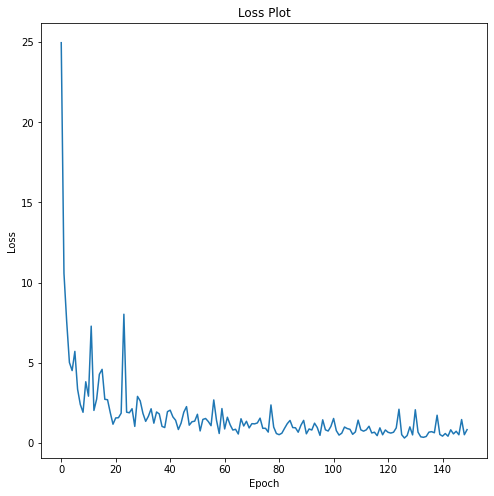

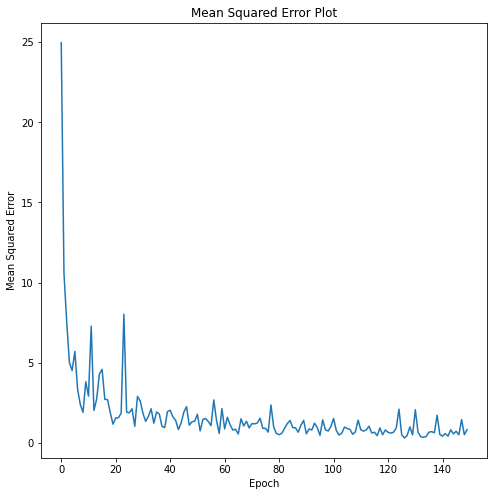

'\nplt.figure(figsize=(8, 8))\n# Plot the loss values\nplt.plot(accuracy)\nplt.title("Accuracy Plot")\nplt.xlabel("Epoch")\nplt.ylabel("Accuracy")\nplt.show()\n\n'

In [110]:
# Extract the loss, accuracy and mse values from the history object
loss = history.history['loss']
mse = history.history['mse']
#accuracy = history.history['accuracy']

plt.figure(figsize=(8, 8))
# Plot the loss values
plt.plot(loss)
plt.title("Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.figure(figsize=(8, 8))
# Plot the mean squared error values
plt.plot(mse)
plt.title("Mean Squared Error Plot")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.show()



'''
plt.figure(figsize=(8, 8))
# Plot the loss values
plt.plot(accuracy)
plt.title("Accuracy Plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

'''

In [17]:
for filename in os.listdir("C:/Users/Otiji Lotanna Brian/Desktop/test"):
    print(filename)
    
    

1 - Copy (3).jpg
1 - Copy (4).jpg
1 - Copy (5).jpg
1 - Copy.jpg
1.jpg
180_1 - Copy (4).jpg
180_1 - Copy (5).jpg
180_1 - Copy.jpg
180_1.jpg
180_2.jpg
180_3 - Copy (2).jpg
180_3 - Copy (3).jpg
180_3 - Copy (4).jpg
180_3 - Copy (5).jpg
180_3.jpg
180_5 - Copy (2).jpg
180_5 - Copy (3).jpg
180_5 - Copy (4).jpg
180_5 - Copy (5).jpg
180_5 - Copy.jpg
180_5.jpg
180_7.jpg
2.jpg
3 - Copy (2).jpg
3 - Copy (3).jpg
3 - Copy (4).jpg
3 - Copy (5).jpg
3 - Copy.jpg
3.jpg
5 - Copy (2).jpg
5 - Copy (3).jpg
5 - Copy (4).jpg
5 - Copy (5).jpg
5 - Copy.jpg
5.jpg
6 - Copy (5).jpg
7.jpg


<Figure size 720x720 with 0 Axes>

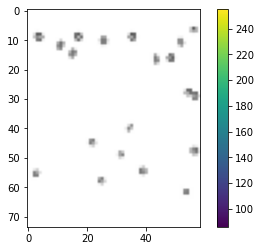

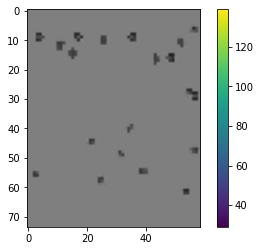

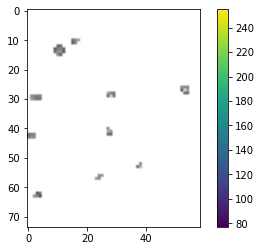

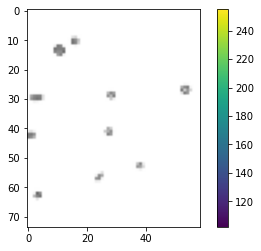

(621, 74, 59, 3)

In [103]:
plt.figure(figsize=(10, 10))
for i in X_train[202:206,::10,::10,:]:
    plt.figure()
    plt.imshow(i)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
X_train[:,::10,::10,:].shape

In [42]:
#y_train[:7]
X_train[:,::5,::10,:].shape

(70, 128, 64, 3)

In [23]:
y_test[25]

array([8], dtype=int64)

In [610]:
X_test = X_test[:,::5,::5]

#  STREAMLIT

## CODE TO USE STREAMLIT

In [84]:
pip install streamlit

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.



  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19583 sha256=12e9a57cf5aae060a26ea50b20c1bc7bbfdcdcdde8179c2ca4bb8eddf54a88b7
  Stored in directory: c:\users\otiji lotanna brian\appdata\local\pip\cache\wheels\19\09\72\3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.10.0
    Uninstalling Pygments-2.10.0:
      Successfully uninstalled Pygments-2.10.0


In [101]:
import streamlit as st

In [107]:
#TO LAUNCH MODEL ON STREAMLIT

#!/usr/bin/env python
# coding: utf-8

# In[1]:


import streamlit as st
import os
import numpy as np
from tensorflow import keras
from PIL import Image

# Load the trained model
model = keras.models.load_model('C:/Users/Otiji Lotanna Brian/Desktop/2nd_experiment.h5')

# Define the input image size
#input_size = (64, 64)

# Define a function to preprocess the image
def preprocess_image(image):
    test_images_list = []
    
    # Resize the image
    #image = image.resize((69, 52), Image.ANTIALIAS)
    
    # Adjust the contrast of the image
    #enhancer = ImageEnhance.Contrast(image)
    #image = enhancer.enhance(1)
    
    #Grayscale
    #image = image.convert("L")
    
    # Convert the image to a numpy array
   
    image_array = np.array(image)
	
    test_images_list.append(image_array)
	
    X_test = np.stack(test_images_list)
    
    # Normalize and center the image
    #image_array = image_array / 255.0
    #image_array = image_array - np.mean(image_array)

    return X_test


# Define a function to make a prediction on a single image
def predict_image(image):
    # Preprocess the image
    X_test = preprocess_image(image)
	
    # Make a prediction on the preprocessed image
    prediction = model.predict(X_test[:,::8,::8,:])

    return np.round(prediction[0][0])

# Define a function to display the prediction result
def display_result(image, prediction):
    # Display the input image
    st.image(image, caption='Input Image', use_column_width=True)

    # Display the prediction result
    st.write(f'Predicted value: {prediction:.2f}')

# Define a function to run the app
def run_app():
    # Create a file uploader
    uploaded_file = st.file_uploader('Choose an image', type=['jpg', 'jpeg', 'png'])

    # If an image is uploaded
    if uploaded_file is not None:
        # Read the image from the file
        image = Image.open(uploaded_file)

        # Make a prediction on the image
        prediction = predict_image(image)

        # Display the result
        display_result(image, prediction)

        
# Run the app
run_app()        
        


In [122]:
def preprocess_image(image):
    # Resize the image
    for filename in os.listdir("C:/Users/Otiji Lotanna Brian/Desktop/test"):
        image = Image.open("C:/Users/Otiji Lotanna Brian/Desktop/test/" + filename)
    
    # Resize the image
        #image = image.resize((69, 52), Image.ANTIALIAS)
    
    # Adjust the contrast of the image
    #enhancer = ImageEnhance.Contrast(image)
    #image = enhancer.enhance(1)
    
    #Grayscale
    #image = image.convert("L")
    
    # Convert the image to a numpy array
        image_array = np.array(image)
    
    # Normalize and center the image
    #image_array = image_array / 255.0
    #image_array = image_array - np.mean(image_array)

    return image_array[::15,::15,:]
x = preprocess_image(image)

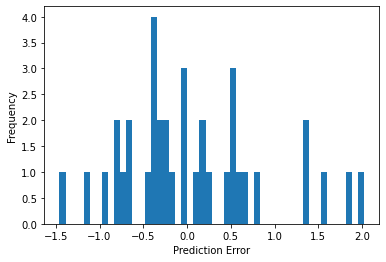

In [188]:
import matplotlib.pyplot as plt

# assuming y_pred and y_test are already defined

# calculate the difference between y_pred and y_test
diff = predict - y_test

# plot the histogram
plt.hist(diff, bins=50)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

In [54]:
human = [1, 2, 4, 3, 2, 2, 4, 3, 2, 3, 4, 0, 2, 3, 3, 1, 6, 2, 3, 1, 4, 0,
       3, 4, 0, 2, 3, 5, 3, 1, 6, 2, 3, 1, 4, 0, 0]
model = [ 2,  2,  3,  2,  2,  4,  4,  4,  4,  3,  4,  2,  2,  2,  3,  1,  6,
        1,  3,  1,  3, -1,  3,  4,  2,  2,  3,  4,  3,  1,  7,  2,  3,  1,
        4,  0,  1]

In [65]:
data = ({"human_count":human, "model_count": model})
df =pd.DataFrame(data)

In [66]:
df.to_excel('C:/Users/Otiji Lotanna Brian/Desktop/data.xlsx', index=False)

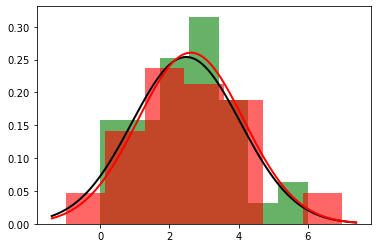

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generate random data
#data = np.random.normal(0, 1, 1000)

# Calculate mean and standard deviation
mu, std = norm.fit(human)
mu1, std1 = norm.fit(model)

# Create histogram
plt.hist(human, bins=(7), density=True, alpha=0.6, color='g')
plt.hist(model, bins=(7), density=True, alpha=0.6, color='r')

# Create x-axis range for the distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Create the distribution curve
p = norm.pdf(x, mu, std)
q= norm.pdf(x,mu1, std1)

plt.plot(x, p, 'k', linewidth=2)
plt.plot(x, q, 'r', linewidth=2)

# Show the plot
plt.show()

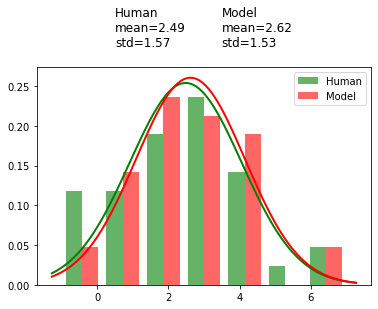

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm,gamma


labels = ['Human', 'Model']
# Calculate mean and standard deviation
mu, std = norm.fit(human)
mu1, std1 = norm.fit(model)

# Create histogram
plt.hist([human, model], bins=(7), density=True, alpha=0.6, color=['g', 'r'], label=labels)

# Create x-axis range for the distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Create the distribution curve
p = norm.pdf(x, mu, std)
q = norm.pdf(x, mu1, std1)

plt.plot(x, p, 'g', linewidth=2)
plt.plot(x, q, 'r', linewidth=2)

# Add legend, mean, and std
plt.legend()
plt.text(0.5, 0.3, 'Human\nmean={:.2f}\nstd={:.2f}'.format(mu, std), fontsize=12)
plt.text(3.5, 0.3, 'Model\nmean={:.2f}\nstd={:.2f}'.format(mu1, std1), fontsize=12)

# Show the plot
plt.show()

In [101]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(human, model) * 100

print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 59.46%
